In [23]:
import pandas as pd
import seaborn as sns

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
penguins.info

<bound method DataFrame.info of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0    Adelie  Torgersen            39.1           18.7              181.0  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1

species - информация о виде пингвина;
* island - название острова в архипелаге Палмера;
* bill_length_mm - длина клюва в мм;
* bill_depth_mm - толщина клюва в мм;
* flipper_length_mm - длина крыла в мм;
* body_mass_g - масса тела в граммах;
* sex - пол особи.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

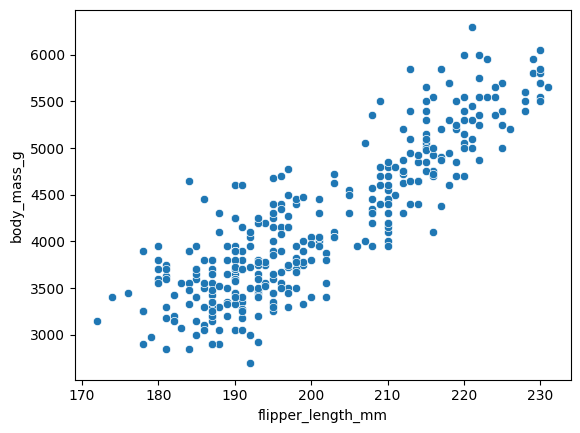

In [6]:
sns.scatterplot(data=penguins,x='flipper_length_mm', y='body_mass_g')

<Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

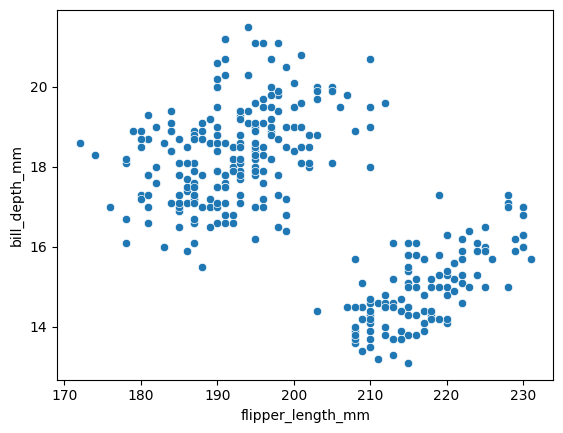

In [7]:
sns.scatterplot(data=penguins,x='flipper_length_mm', y='bill_depth_mm')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

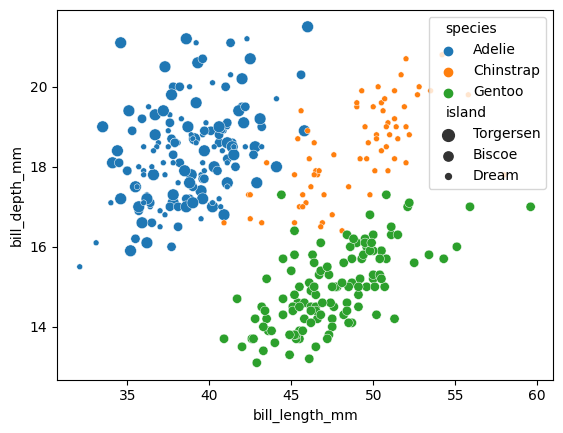

In [10]:
sns.scatterplot(data=penguins,x='bill_length_mm', y='bill_depth_mm', hue='species', size='island')

<Axes: >

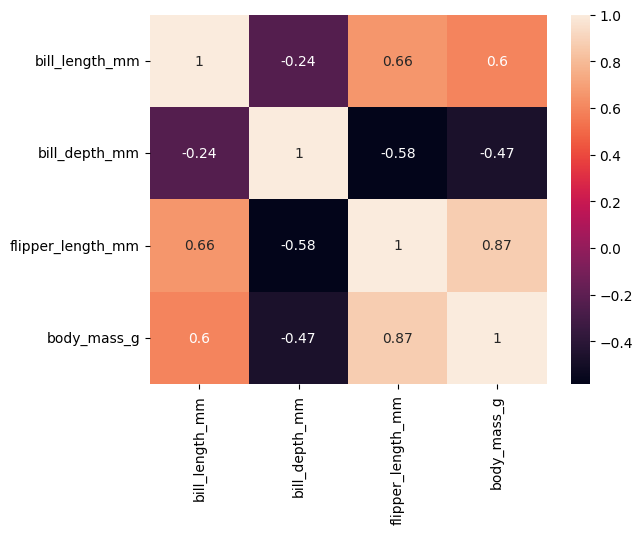

In [12]:
lst= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.heatmap(penguins[lst].corr(), annot=True)

<Axes: xlabel='body_mass_g', ylabel='Count'>

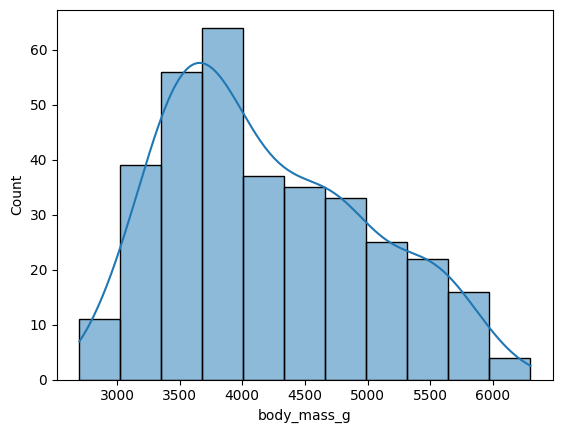

In [19]:
sns.histplot(data=penguins, x='body_mass_g', kde=True)

<Axes: xlabel='bill_length_group', ylabel='Count'>

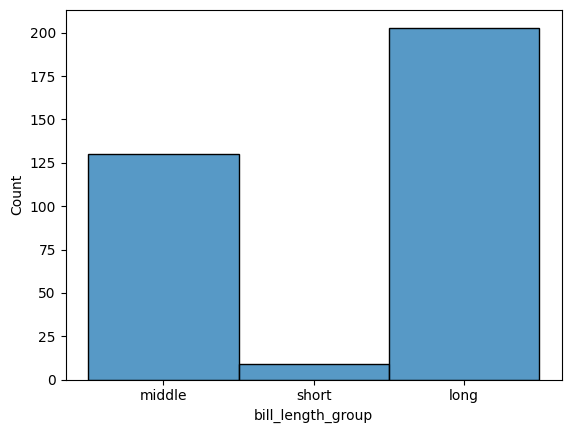

In [15]:
penguins.loc[penguins['bill_length_mm'] > 42, 'bill_length_group'] = 'long'
penguins.loc[(penguins['bill_length_mm'] <= 42) & (penguins['bill_length_mm'] >= 35), 'bill_length_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] < 35, 'bill_length_group'] = 'short'
sns.histplot(data=penguins, x='bill_length_group') 

Text(0.5, 1.0, 'Flipper length for 3 Pengguin Species by Sex')

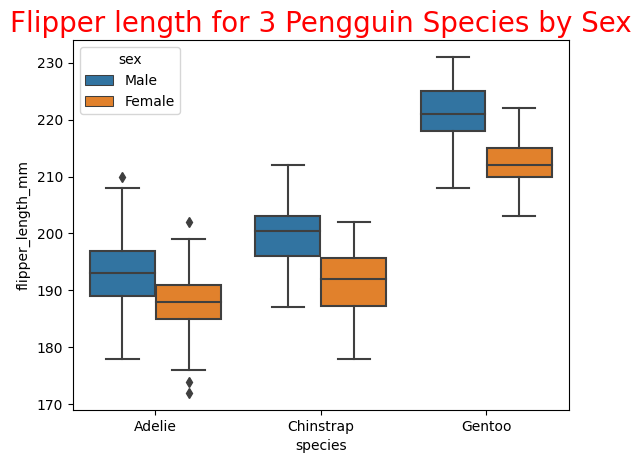

In [18]:
import matplotlib.pyplot as plt
sns.boxplot(x='species',y='flipper_length_mm', data=penguins, hue = 'sex')
plt.title('Flipper length for 3 Pengguin Species by Sex', size=20, color='red')

| Задание 44 |
| --- |
| В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?

import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI'lst})
data.head() |

In [24]:
import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()

,whoAmI
0,human
1,human
2,human
3,human
4,robot


In [25]:
data.loc[data['whoAmI'] == 'robot', 'one_bot'] = 0
data.loc[data['whoAmI'] == 'human', 'one_bot'] = 1
data['one_bot']

0     1.0
1     1.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    1.0
14    1.0
15    1.0
16    1.0
17    0.0
18    1.0
19    0.0
Name: one_bot, dtype: float64

<Axes: xlabel='whoAmI', ylabel='Count'>

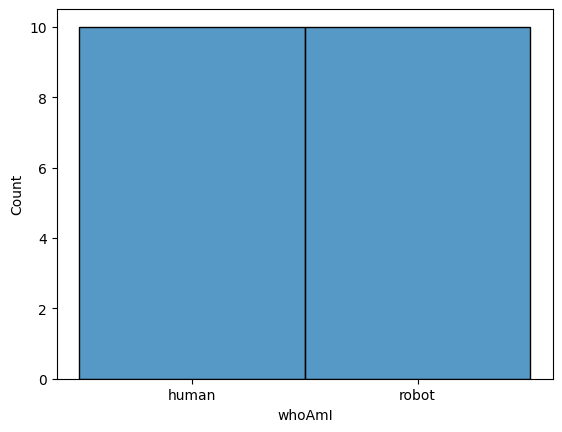

In [26]:
sns.histplot(data = data, x='whoAmI')

In [28]:
pd.get_dummies(data['whoAmI'])

,human,robot
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,True,False


In [32]:
data.loc[data['whoAmI'] == 'robot', 'robot'] = True
data.loc[data['whoAmI'] != 'robot', 'robot'] = False
data.loc[data['whoAmI'] == 'human', 'human'] = True
data.loc[data['whoAmI'] != 'human', 'human'] = False
data[['human', 'robot' ]]

,human,robot
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,True,False
